17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


c:\Users\leewa\anaconda3\a cute anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 62s 130ms/step - accuracy: 0.5294 - loss: 0.6925 - val_accuracy: 0.6582 - val_loss: 0.6045
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 47s 120ms/step - accuracy: 0.7264 - loss: 0.5423 - val_accuracy: 0.8044 - val_loss: 0.4504
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 47s 120ms/step - accuracy: 0.7846 - loss: 0.4520 - val_accuracy: 0.7647 - val_loss: 0.5080
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 118ms/step - accuracy: 0.8524 - loss: 0.3494 - val_accuracy: 0.6996 - val_loss: 0.5732
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 68s 174ms/step - accuracy: 0.8221 - loss: 0.4084 - val_accuracy: 0.7387 - val_loss: 0.5291
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.7348 - loss: 0.5353
Test accuracy: 0.7387199997901917


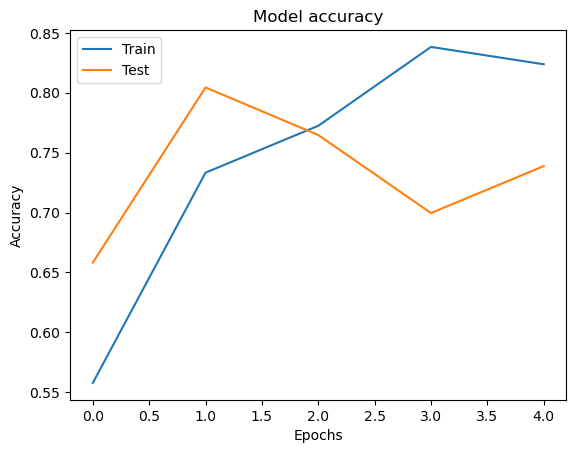

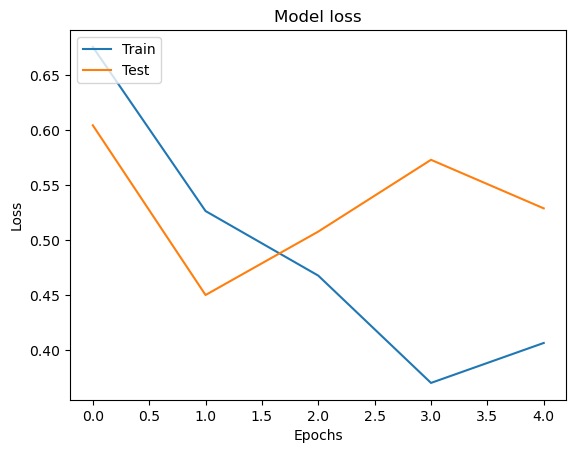

782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step
Predictions for first 5 reviews: [[0.5551517 ]
 [0.8885579 ]
 [0.1077343 ]
 [0.32158026]
 [0.9472176 ]]


In [ ]:
#Sourabh Vamdevan 
#RNN for Sentiment Analysis on IMDB dataset.
#RNN stands for Recurrent Neural Network.
#RNN is a type of neural network that is designed to handle sequential data.
#It is particularly useful for natural language processing tasks such as sentiment analysis.
#So in this example, we will build a RNN model to perform sentimnent analysis on the IMDB dataset.



import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

#This will load IMDB dataset.
max_features = 10000  
maxlen = 500  #This will limit the length of the reviews to 500 words.

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


def build_rnn_model(input_shape, num_classes=1):
    model = models.Sequential()
    
    
    model.add(layers.Embedding(input_dim=max_features, output_dim=128, input_length=input_shape[0]))
    
    
    model.add(layers.SimpleRNN(128, activation='tanh', return_sequences=False))
    
    
    model.add(layers.Dense(64, activation='relu'))
    
    
    model.add(layers.Dense(num_classes, activation='sigmoid'))
    
    return model


input_shape = (maxlen,)


rnn_model = build_rnn_model(input_shape)


rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


rnn_model.summary()


history = rnn_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


test_loss, test_acc = rnn_model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


predictions = rnn_model.predict(x_test)
print(f"Predictions for first 5 reviews: {predictions[:5]}")


